---
# Hierarchical Clustering - Model 2
---
In this notebook, ...


## Results

---

### Importing necessary library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer
import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering

### Read data file

**Read Cleaned + Feature Engineered File**

In [2]:
df = pd.read_excel('../data/AGRIBALYSE3.2_Synthese_cleaned_featEng.xlsx')
df

,Season Code,Airplane Code,EF Score,Ozone Layer Depletion,Ionizing Radiation,Photochemical Ozone Formation,Fine Particles,Toxicological Effects (Non-carcinogenic),Toxicological Effects (Carcinogenic),Terrestrial and Freshwater Acidification,...,Delivery_Ambiant (long),Delivery_Ambiant (moyen),Delivery_Congelé,Delivery_Glacé,Packaging_PACK PROXY,Preparation_Four,Preparation_Micro-onde,Preparation_Pas de préparation,Preparation_Poêle,Preparation_Réfrigéré chez le consommateur
0,2,0,1.874152,2.932471e-07,30.251469,0.025011,4.738923e-07,2.087261e-07,6.622400e-09,0.045589,...,1,0,0,0,1,0,0,1,0,0
1,2,0,0.148315,2.703735e-08,0.558035,0.003928,7.864125e-08,4.238290e-08,8.815249e-10,0.008049,...,1,0,0,0,1,0,0,1,0,0
2,2,0,0.147701,3.382798e-08,0.545093,0.004025,6.420649e-08,2.658238e-08,2.141891e-09,0.006324,...,1,0,0,0,1,0,0,1,0,0
3,2,0,1.547348,6.270593e-07,11.185511,0.051406,8.615935e-07,9.852629e-08,6.933245e-09,0.110581,...,1,0,0,0,1,0,0,1,0,0
4,2,0,1.547348,6.270593e-07,11.185511,0.051406,8.615935e-07,9.852629e-08,6.933245e-09,0.110581,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,2,0,2.744841,3.465597e-07,2.183183,0.052400,2.364050e-06,3.273358e-07,1.520520e-08,0.337696,...,0,0,0,1,0,0,0,0,0,0
2447,2,0,2.719832,3.360531e-07,1.988039,0.051666,2.357969e-06,3.246593e-07,1.515039e-08,0.337371,...,0,0,0,1,0,0,0,0,1,0
2448,2,0,2.738488,3.342279e-07,2.401715,0.051710,2.361347e-06,3.275382e-07,1.515673e-08,0.337658,...,0,0,0,1,0,1,0,0,0,0
2449,2,0,3.418940,4.171038e-07,2.867791,0.064661,2.950918e-06,4.093391e-07,1.894341e-08,0.421983,...,0,0,0,1,0,1,0,0,0,0


**Read Cleaned File**

In [3]:
df_o = pd.read_excel('../data/AGRIBALYSE3.2_Synthese_cleaned.xlsx')
df_o

,Food Group,Food Sub-group,LCI Name,Season Code,Airplane Code,Delivery,Packaging,Preparation,EF Score,Ozone Layer Depletion,...,Marine Eutrophication,Terrestrial Eutrophication,Ecotoxicity for Freshwater Aquatic Ecosystems,Land Use,Water Resource Depletion,Energy Resource Depletion,Mineral Resource Depletion,Climate Change - Biogenic Emissions,Climate Change - Fossil Emissions,Climate Change - Emissions from Land Use Change
0,aides culinaires et ingrédients divers,aides culinaires,"Aromatic stock cube, for fish, dehydrated",2,0,Ambiant (long),PACK PROXY,Pas de préparation,1.874152,2.932471e-07,...,0.026783,0.137099,70.183757,106.309500,3.380742,700.159580,0.000051,0.103694,7.459628,0.021197
1,aides culinaires et ingrédients divers,aides culinaires,Topping sauce for pizza,2,0,Ambiant (long),PACK PROXY,Pas de préparation,0.148315,2.703735e-08,...,0.004162,0.030263,11.027442,67.673943,2.468103,24.405351,0.000006,0.033626,1.015114,-0.108325
2,aides culinaires et ingrédients divers,aides culinaires,"Soy ""cream"" preparation",2,0,Ambiant (long),PACK PROXY,Pas de préparation,0.147701,3.382798e-08,...,0.007233,0.024434,30.835753,116.492280,0.422468,22.429809,0.000004,0.025180,0.964544,0.184348
3,aides culinaires et ingrédients divers,algues,"Seaweed, agar, raw",2,0,Ambiant (long),PACK PROXY,Pas de préparation,1.547348,6.270593e-07,...,0.015034,0.143648,57.867520,26.718351,4.833158,395.946390,0.000079,0.040063,11.740311,0.006545
4,aides culinaires et ingrédients divers,algues,"Sea lettuce (Enteromorpha sp.), dried or dehyd...",2,0,Ambiant (long),PACK PROXY,Pas de préparation,1.547348,6.270593e-07,...,0.015034,0.143648,57.867520,26.718351,4.833158,395.946390,0.000079,0.040063,11.740311,0.006545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,"viandes, œufs, poissons",viandes cuites,"Veal, knuckle or shank, braised or boiled",2,0,Glacé,PACK AGB,Cuisson à l'eau,2.744841,3.465597e-07,...,0.091173,1.457487,391.691640,1336.417000,4.021206,149.244380,0.000057,15.861507,11.205989,2.617929
2447,"viandes, œufs, poissons",viandes cuites,"Veal, tenderloin, grilled/pan-fried",2,0,Glacé,PACK AGB,Poêle,2.719832,3.360531e-07,...,0.091187,1.457302,392.319170,1339.161800,3.972692,141.891310,0.000056,15.821821,10.946006,2.621672
2448,"viandes, œufs, poissons",viandes cuites,"Veal, tenderloin, roasted",2,0,Glacé,PACK AGB,Four,2.738488,3.342279e-07,...,0.091077,1.457291,392.244620,1336.137200,3.991295,149.677240,0.000059,15.821740,10.910768,2.617884
2449,"viandes, œufs, poissons",viandes cuites,"Veal, roast, cooked",2,0,Glacé,PACK AGB,Four,3.418940,4.171038e-07,...,0.113935,1.821645,490.596670,1670.079500,4.984198,184.179660,0.000072,19.864699,13.630845,3.272343


---

<center>
    
## Preparing data

</center>

---

### Separate X and y features

In [4]:
# Seperate X and y features
X = df.drop(columns=['EF Score'])
y = df['EF Score']

### Scale X features

In [5]:
# Create instance of scaler
scaler = StandardScaler()

# Scale the data
X_scaled = scaler.fit_transform(X)

---

<center>
    
## Hierarchical Clustering

</center>

---

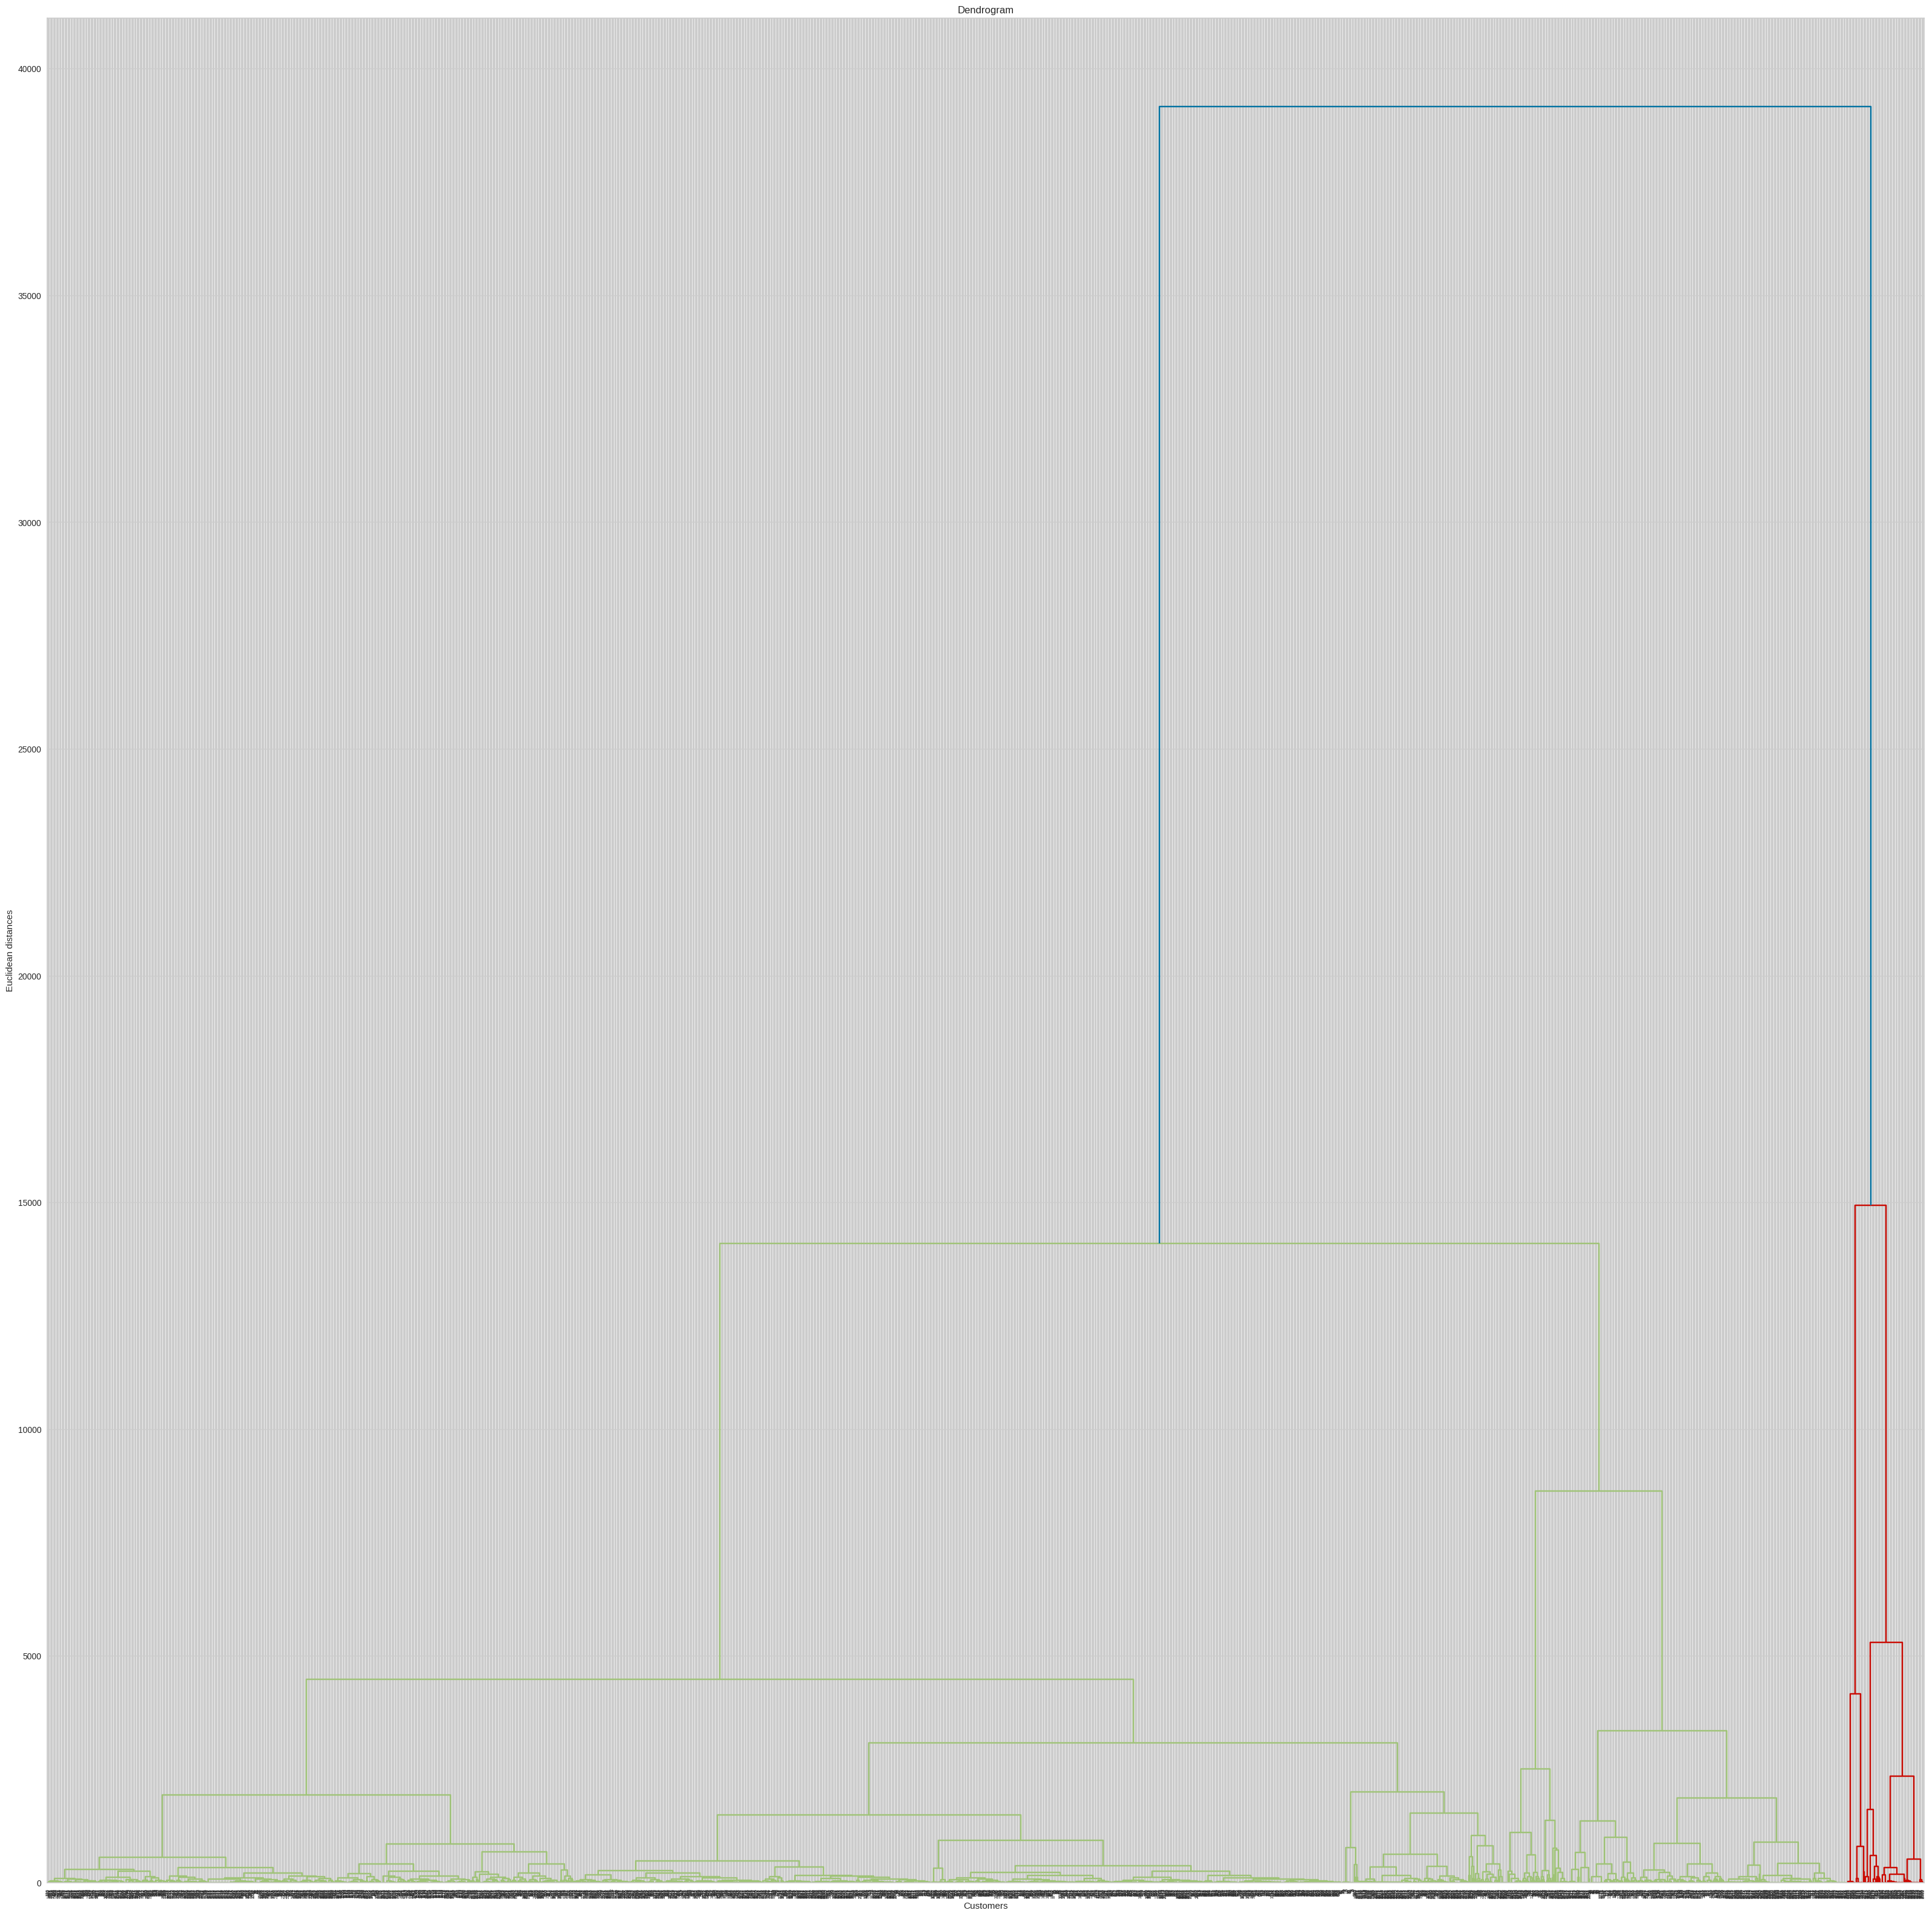

In [6]:
plt.figure(figsize=(40,40))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

---

<center>
    
## Agglomerative Clustering Model

</center>

---

### Find best optimal K value
---
Conclusion: Best Optimal K value woud be between 65 and 80 as concluded with the PCA analysis in the Feature_Engineering notebook.

**Elbow plot**

In [7]:
# List to store the sum of squared distances (inertia) for each K
ssd = []  

# Testing K values from 2 to 70
for k in range(2, 100):  
    kmeans = KMeans(n_clusters=k, random_state=5)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)

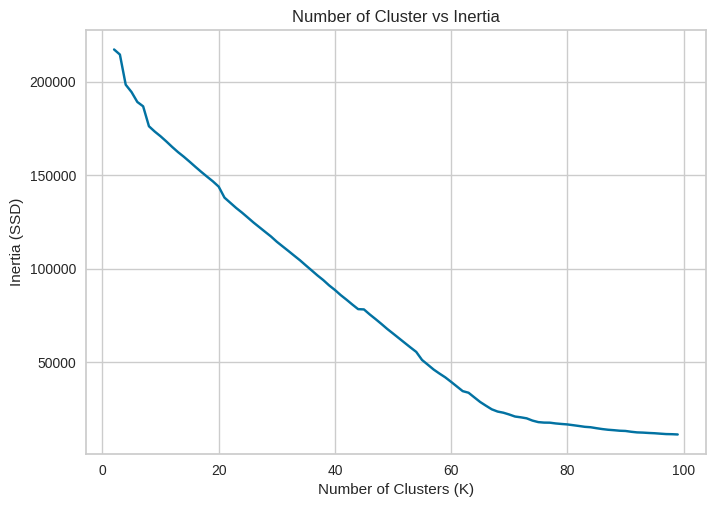

In [8]:
# Plot the elbow graph
plt.plot(range(2, 100), ssd)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSD)')
plt.title('Number of Cluster vs Inertia')
plt.show()

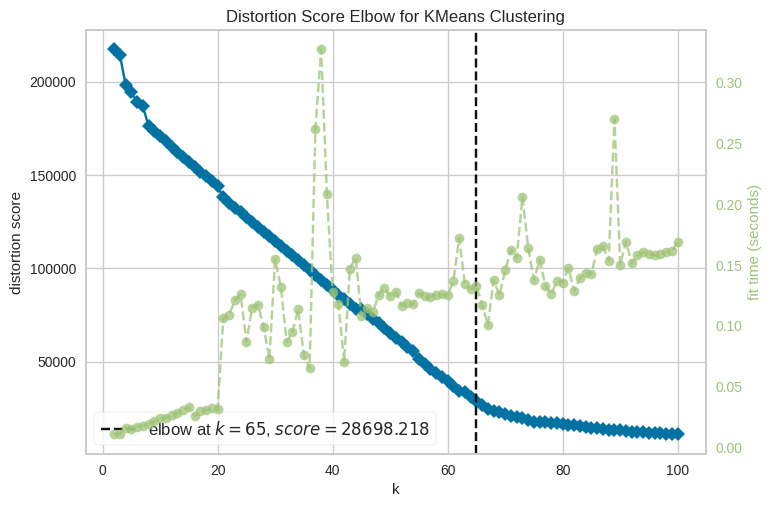

In [9]:
# Create the Elbow Visualizer for max number of 10 clusters
Elbow_M = KElbowVisualizer(KMeans(random_state=5), k=100)
Elbow_M.fit(X_scaled)  # fit on PCA transformed data
Elbow_M.show();

**Elbow plot (k from 70 to 100)**

In [10]:
# List to store the sum of squared distances (inertia) for each K
ssd = []  

# Testing K values from 2 to 70
for k in range(70, 120):  
    kmeans = KMeans(n_clusters=k, random_state=5)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)

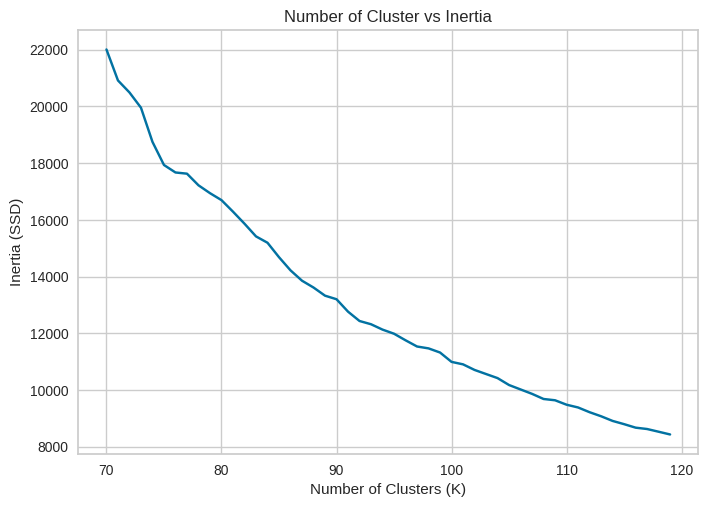

In [11]:
# Plot the elbow graph
plt.plot(range(70, 120), ssd)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSD)')
plt.title('Number of Cluster vs Inertia')
plt.show()

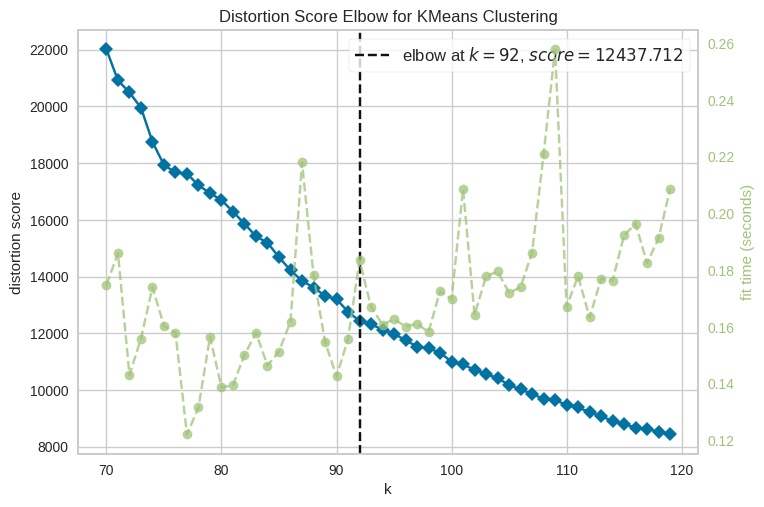

In [12]:
# Create the Elbow Visualizer for max number of 10 clusters
Elbow_M = KElbowVisualizer(KMeans(random_state=5), k=(70,120))

Elbow_M.fit(X_scaled)  # fit on PCA transformed data
Elbow_M.show();

---
### Creating a KMeans model with 60 clusters

---

**Create intance of model**

In [13]:
ac = AgglomerativeClustering(n_clusters= 60, metric='euclidean', linkage='ward')

**Fit the model on the dataset**

In [14]:
ac.fit(X_scaled)

AgglomerativeClustering(n_clusters=60)

---
### Evaluate the value K=60 for number of cluster

---

**Add Cluster labels to the cleaned dataframe**

In [15]:
df_o['label'] = ac.labels_

df_o['label_str'] = ac.labels_.astype(str)

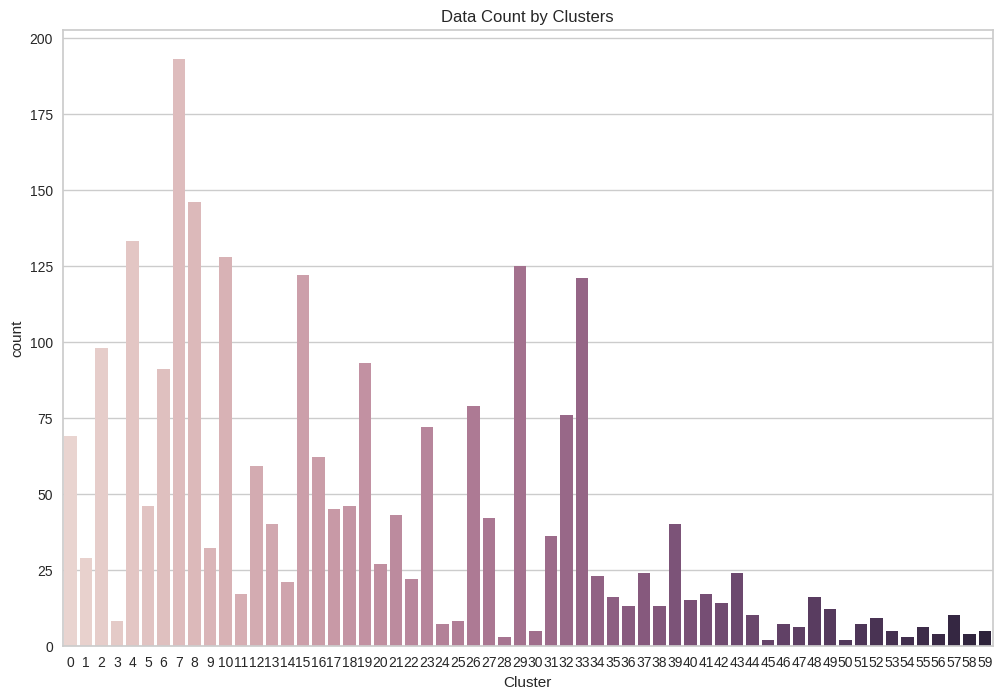

In [16]:
# Create figure and adjust size
plt.figure(figsize=(12,8))

# Create count plot
ax = sns.countplot(x=df_o['label'], hue=df_o['label'], legend=False)

# Add title
ax.set_title('Data Count by Clusters')

# Add axis labels
ax.set_xlabel('Cluster')

# Show plot
plt.show()

/tmp/ipykernel_2152625/83504249.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 60)
/tmp/ipykernel_2152625/83504249.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 60 * 5)  # Sample from a wider range


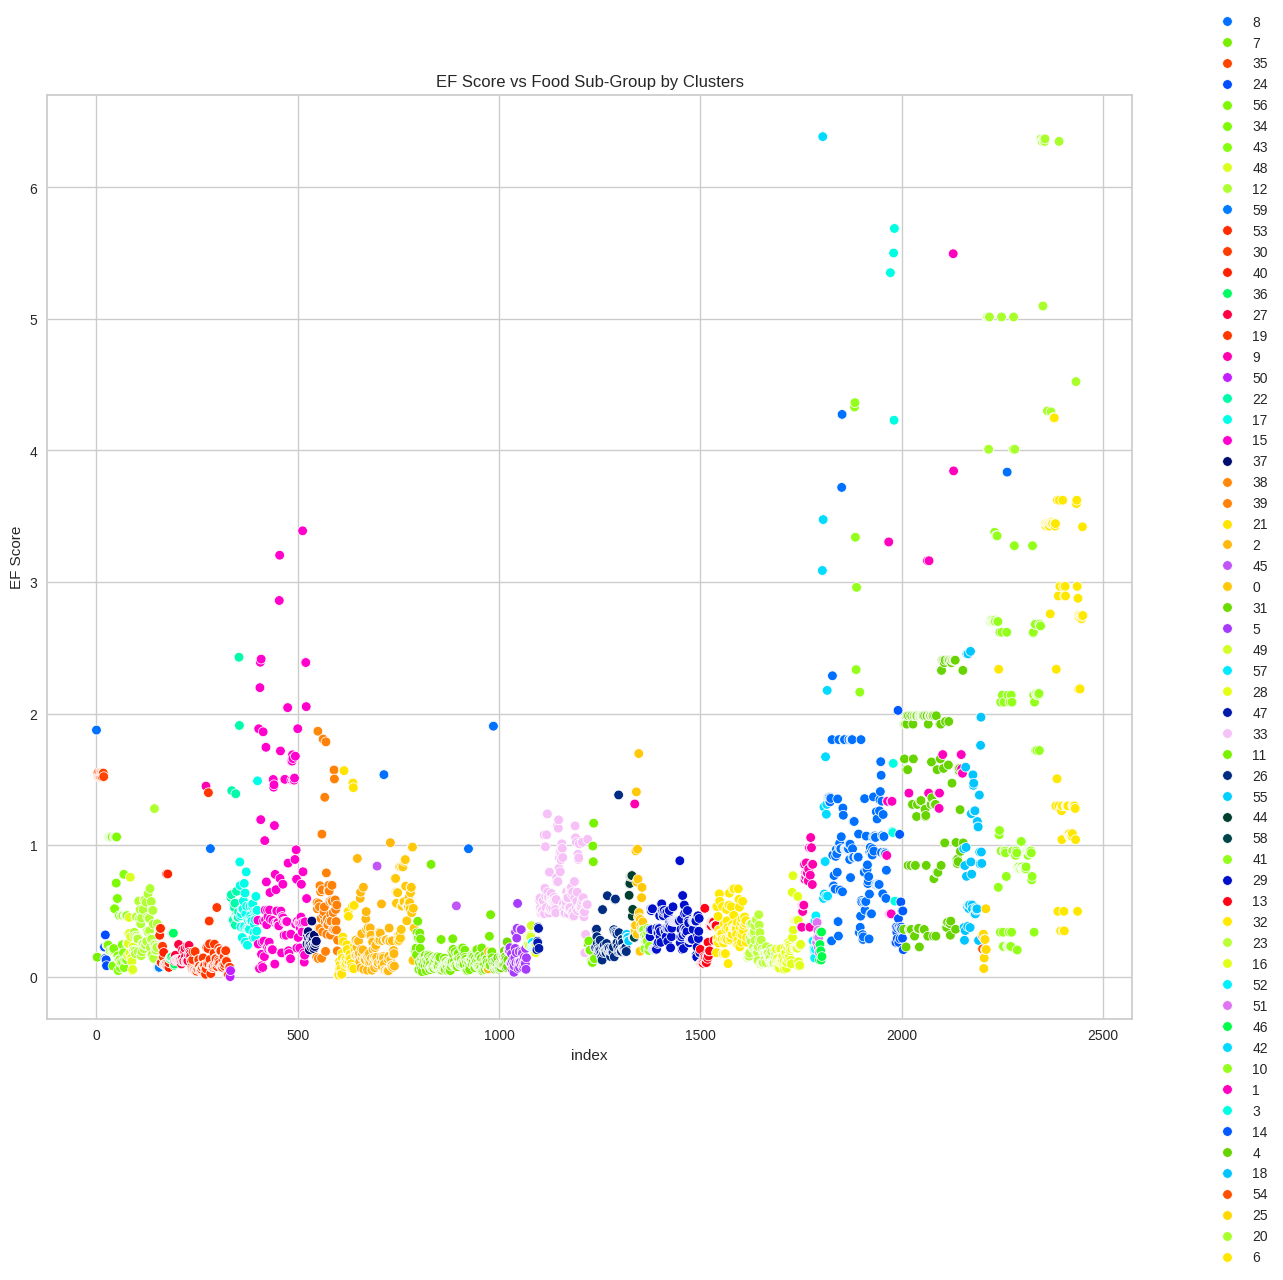

In [17]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.cm.get_cmap("gist_ncar", 60) 
palette = [cmap(i) for i in range(60)]

cmap = plt.cm.get_cmap("gist_ncar", 60 * 5)  # Sample from a wider range

# Select non-continuous indices to avoid smooth gradients
indices = np.random.choice(range(cmap.N), 60, replace=False) 
palette = [cmap(i) for i in indices]


# Create count plot
ax = sns.scatterplot(df_o, x=df_o.index, y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('index')
ax.set_ylabel('EF Score')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_2152625/316389407.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 60)
/tmp/ipykernel_2152625/316389407.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 60 * 5)  # Sample from a wider range
/tmp/ipykernel_2152625/316389407.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)


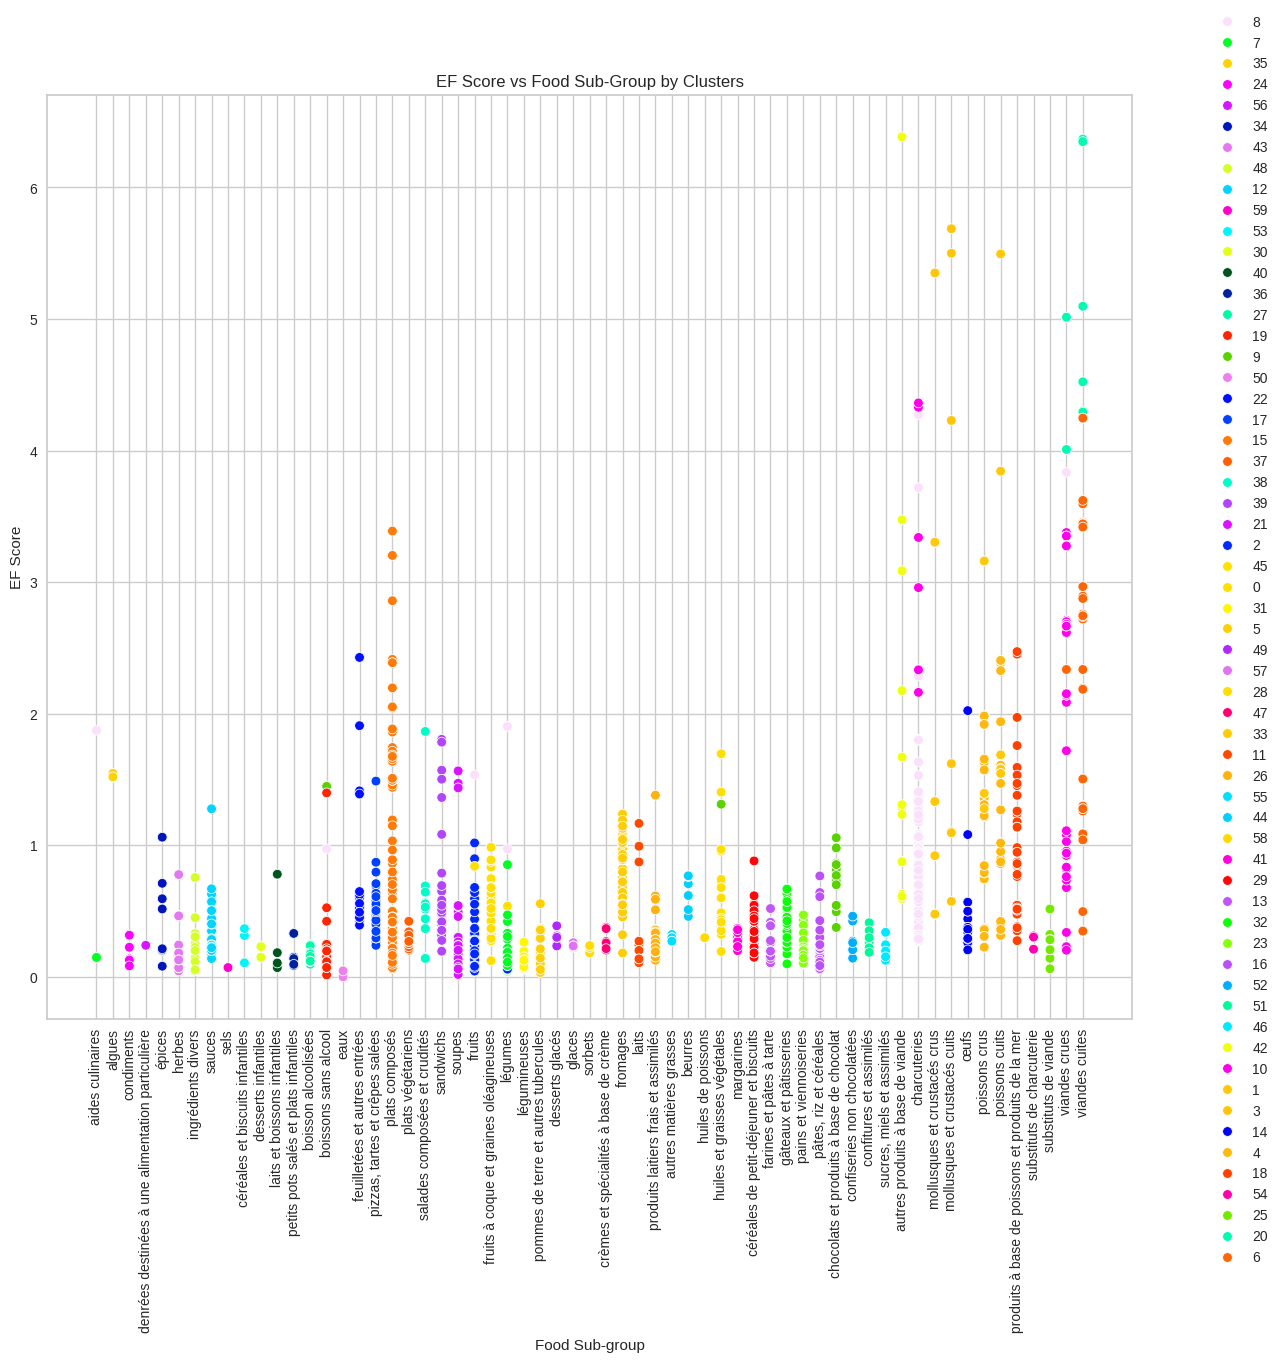

In [18]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.cm.get_cmap("gist_ncar", 60) 
palette = [cmap(i) for i in range(60)]


cmap = plt.cm.get_cmap("gist_ncar", 60 * 5)  # Sample from a wider range

# Select non-continuous indices to avoid smooth gradients
indices = np.random.choice(range(cmap.N), 60, replace=False) 
palette = [cmap(i) for i in indices]


# Create count plot
ax = sns.scatterplot(df_o, x='Food Sub-group', y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('Food Sub-group')
ax.set_ylabel('EF Score')

#
ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


---
### Creating a KMeans model with 80 clusters

---

**Create intance of model**

In [19]:
ac = AgglomerativeClustering(n_clusters= 80, metric='euclidean', linkage='ward')

**Fit the model on the dataset**

In [20]:
ac.fit(X_scaled)

AgglomerativeClustering(n_clusters=80)

---
### Evaluate the value K=80 for number of cluster

---

**Add Cluster labels to the cleaned dataframe**

In [21]:
df_o['label'] = ac.labels_

df_o['label_str'] = ac.labels_.astype(str)

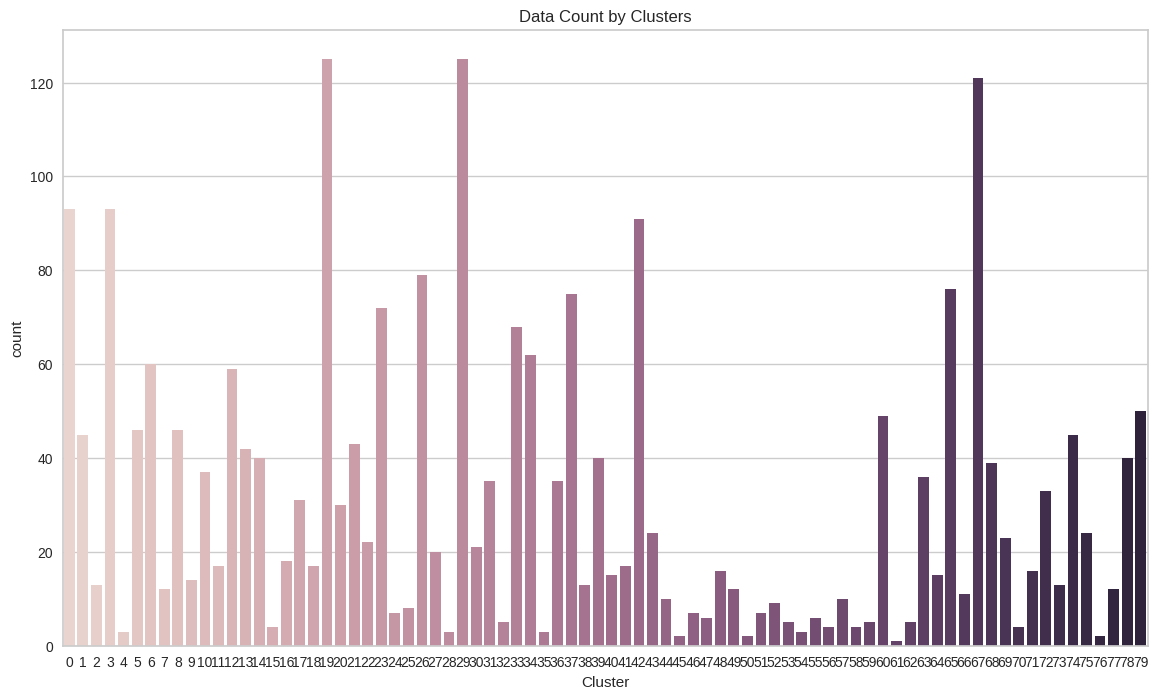

In [22]:
# Create figure and adjust size
plt.figure(figsize=(14,8))

# Create count plot
ax = sns.countplot(x=df_o['label'], hue=df_o['label'], legend=False)

# Add title
ax.set_title('Data Count by Clusters')

# Add axis labels
ax.set_xlabel('Cluster')

# Show plot
plt.show()

/tmp/ipykernel_2152625/1891239328.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 80)
/tmp/ipykernel_2152625/1891239328.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 80 * 5)  # Sample from a wider range


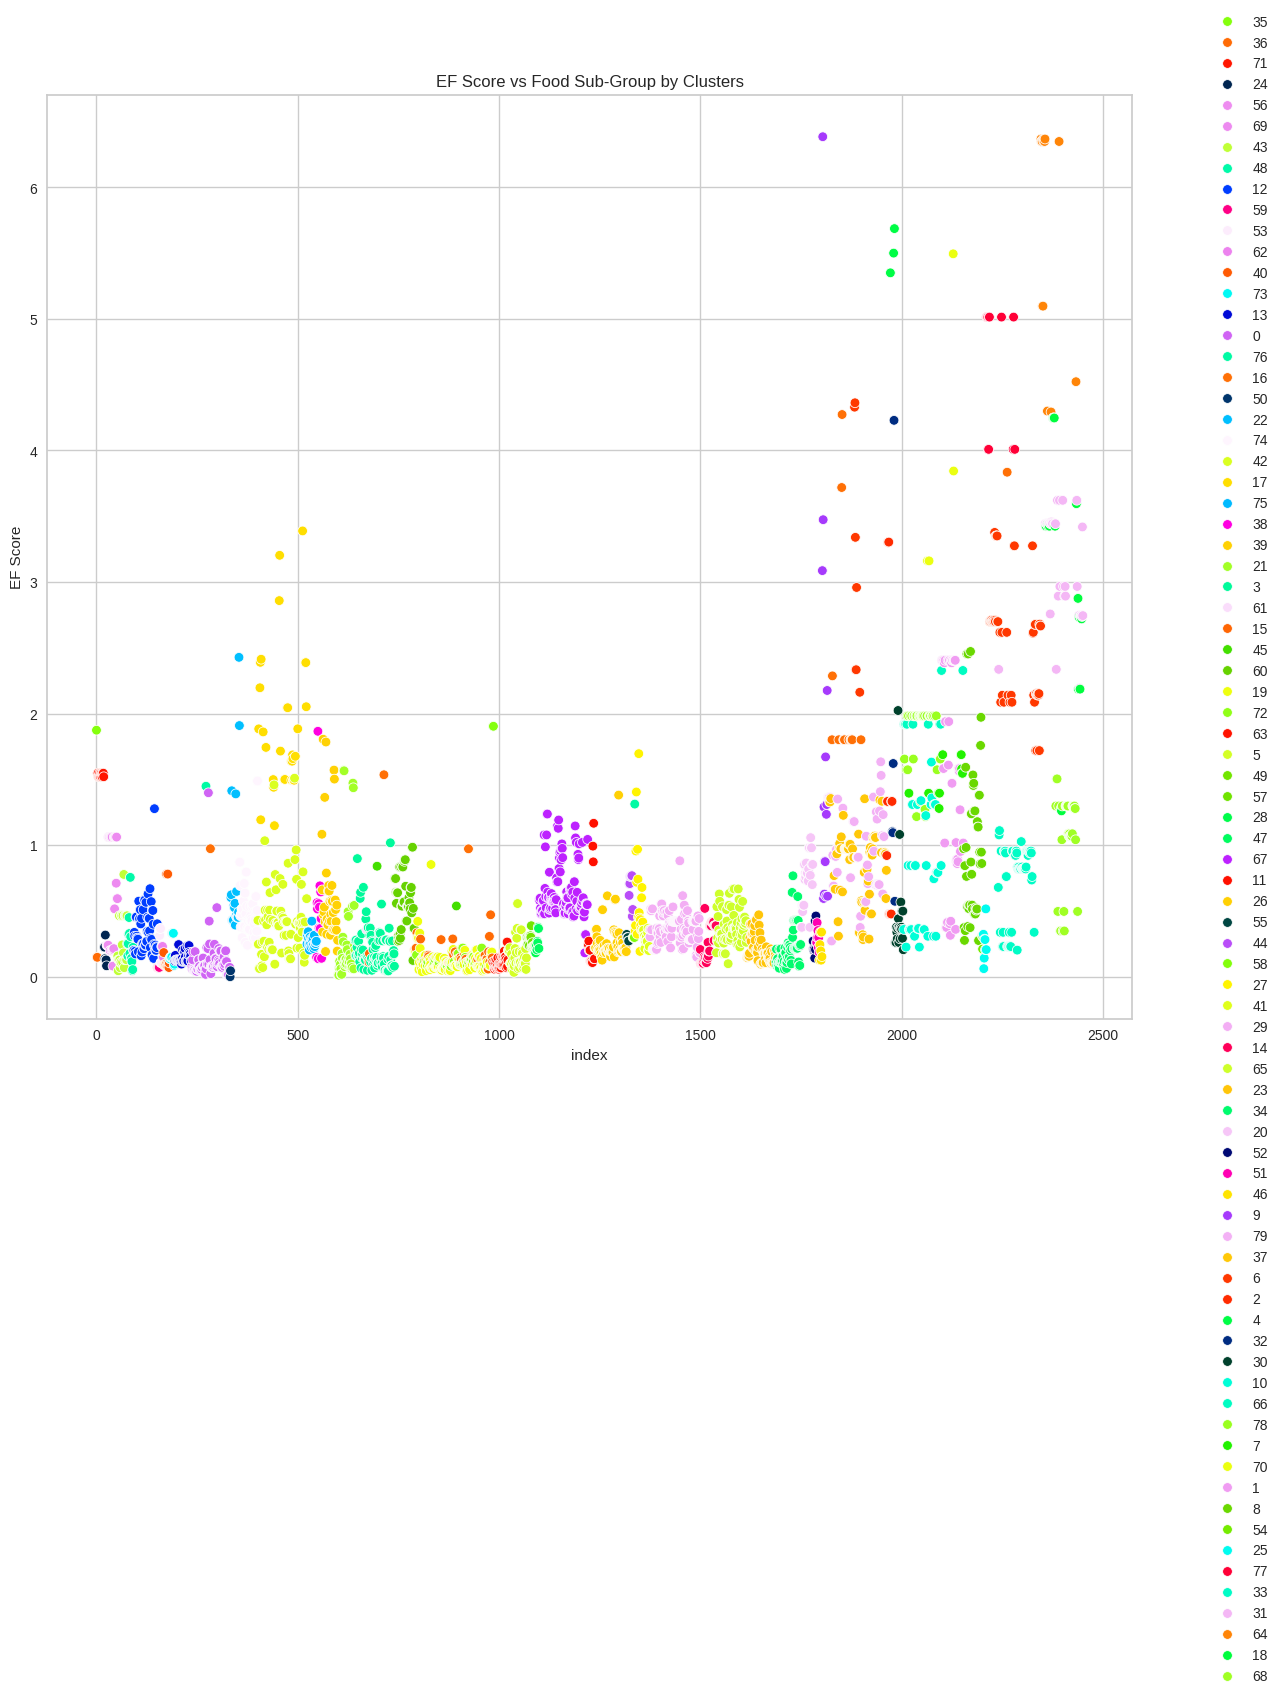

In [23]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.cm.get_cmap("gist_ncar", 80) 
palette = [cmap(i) for i in range(80)]

cmap = plt.cm.get_cmap("gist_ncar", 80 * 5)  # Sample from a wider range

# Select non-continuous indices to avoid smooth gradients
indices = np.random.choice(range(cmap.N), 80, replace=False) 
palette = [cmap(i) for i in indices]


# Create count plot
ax = sns.scatterplot(df_o, x=df_o.index, y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('index')
ax.set_ylabel('EF Score')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_2152625/183826753.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 80)
/tmp/ipykernel_2152625/183826753.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 80 * 5)  # Sample from a wider range
/tmp/ipykernel_2152625/183826753.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)


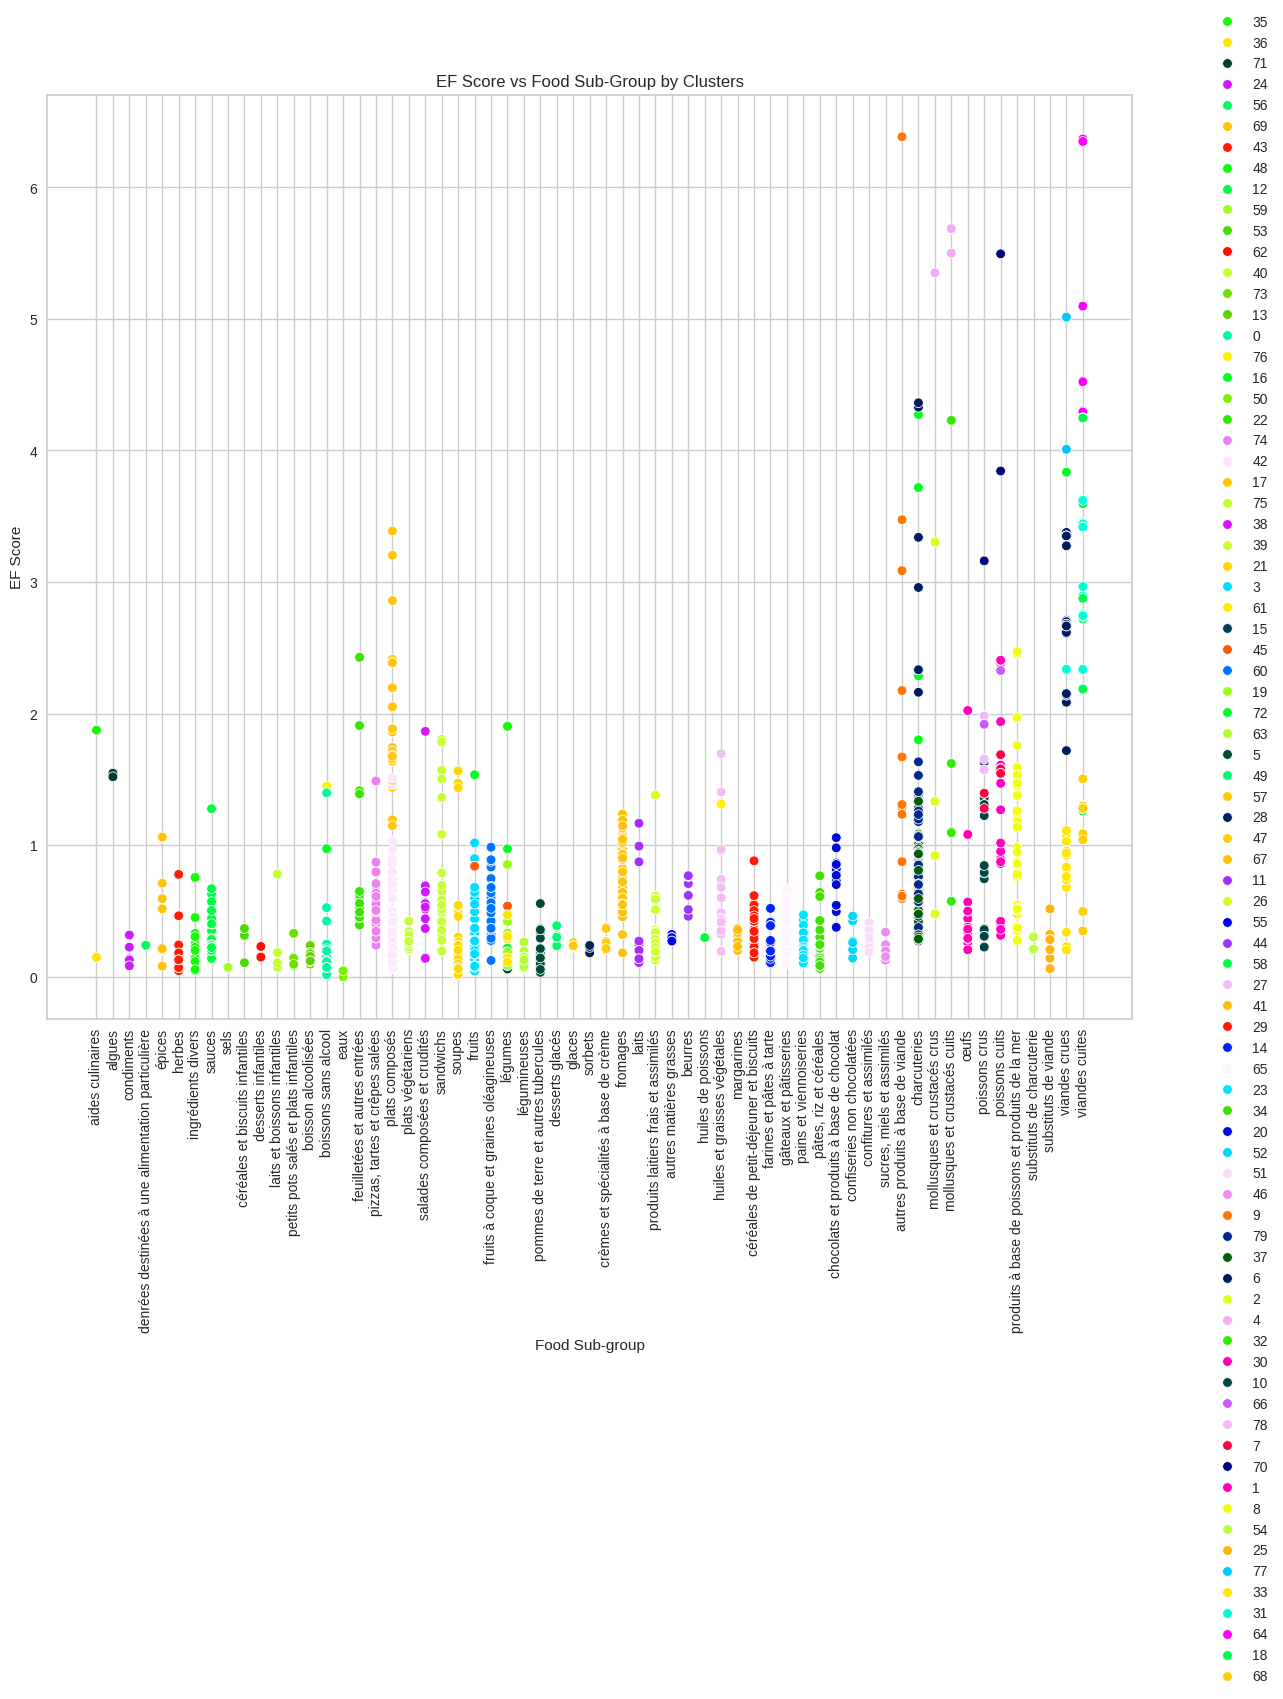

In [24]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.cm.get_cmap("gist_ncar", 80) 
palette = [cmap(i) for i in range(80)]

cmap = plt.cm.get_cmap("gist_ncar", 80 * 5)  # Sample from a wider range

# Select non-continuous indices to avoid smooth gradients
indices = np.random.choice(range(cmap.N), 80, replace=False) 
palette = [cmap(i) for i in indices]

# Create count plot
ax = sns.scatterplot(df_o, x='Food Sub-group', y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('Food Sub-group')
ax.set_ylabel('EF Score')

#
ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


---
### Creating a KMeans model with 90 clusters

---

**Create intance of model**

In [25]:
ac = AgglomerativeClustering(n_clusters= 90, metric='euclidean', linkage='ward')

**Fit the model on the dataset**

In [26]:
ac.fit(X_scaled)

AgglomerativeClustering(n_clusters=90)

---
### Evaluate the value K=90 for number of cluster

---

**Add Cluster labels to the cleaned dataframe**

In [27]:
df_o['label'] = ac.labels_

df_o['label_str'] = ac.labels_.astype(str)

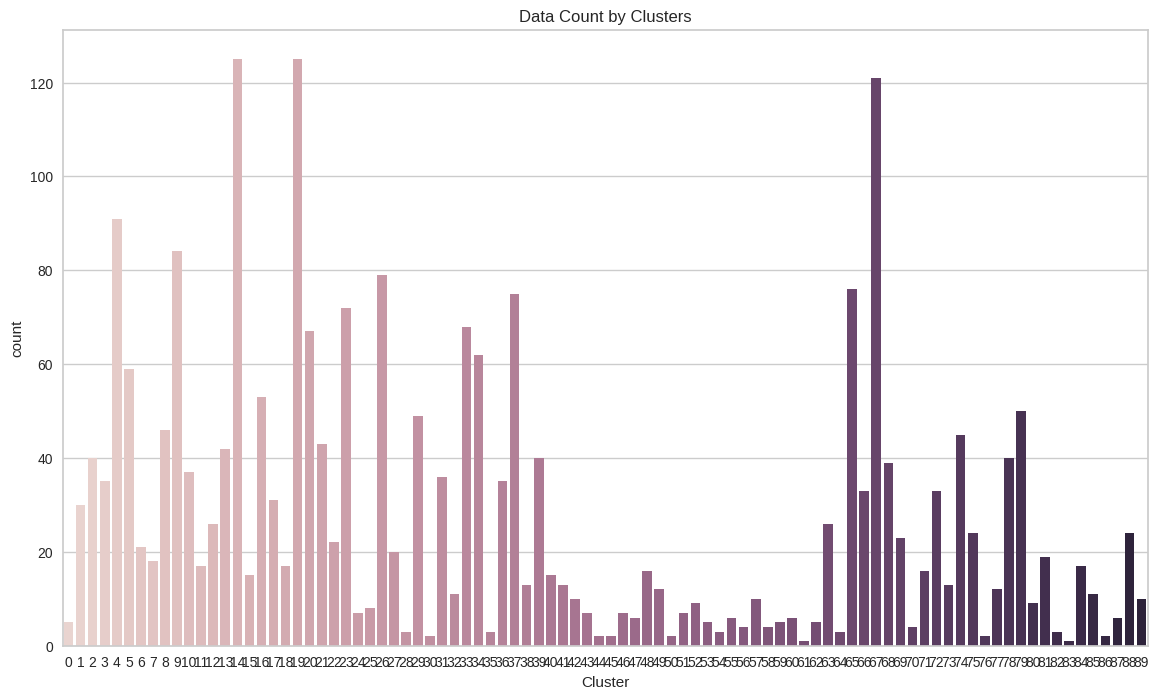

In [28]:
# Create figure and adjust size
plt.figure(figsize=(14,8))

# Create count plot
ax = sns.countplot(x=df_o['label'], hue=df_o['label'], legend=False)

# Add title
ax.set_title('Data Count by Clusters')

# Add axis labels
ax.set_xlabel('Cluster')

# Show plot
plt.show()

/tmp/ipykernel_2152625/1188535821.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 90)
/tmp/ipykernel_2152625/1188535821.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 90 * 5)  # Sample from a wider range


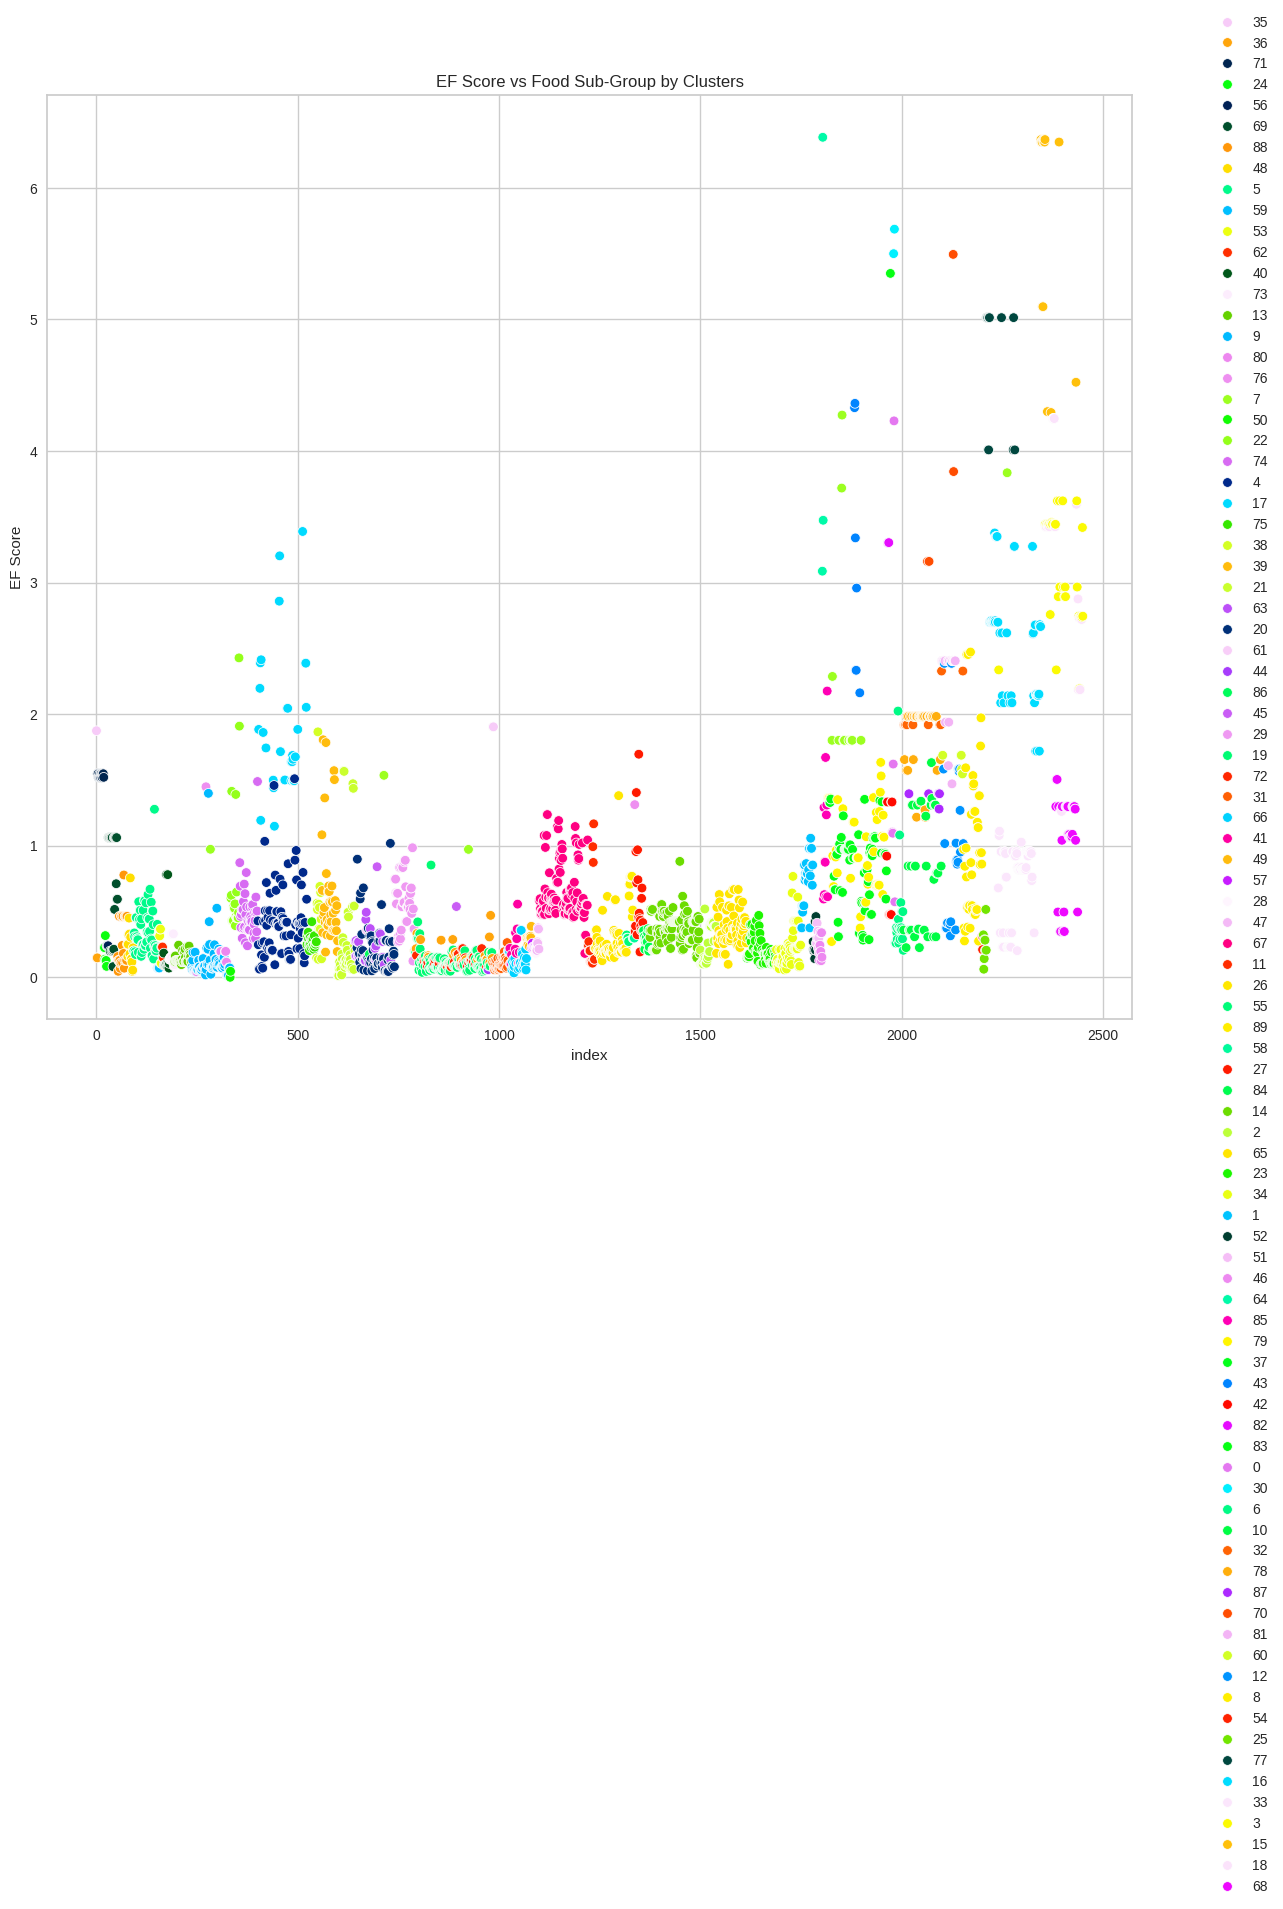

In [29]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.cm.get_cmap("gist_ncar", 90) 
palette = [cmap(i) for i in range(90)]

cmap = plt.cm.get_cmap("gist_ncar", 90 * 5)  # Sample from a wider range

# Select non-continuous indices to avoid smooth gradients
indices = np.random.choice(range(cmap.N), 90, replace=False) 
palette = [cmap(i) for i in indices]

# Create count plot
ax = sns.scatterplot(df_o, x=df_o.index, y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('index')
ax.set_ylabel('EF Score')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_2152625/736422139.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 90)
/tmp/ipykernel_2152625/736422139.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 90 * 5)  # Sample from a wider range
/tmp/ipykernel_2152625/736422139.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)


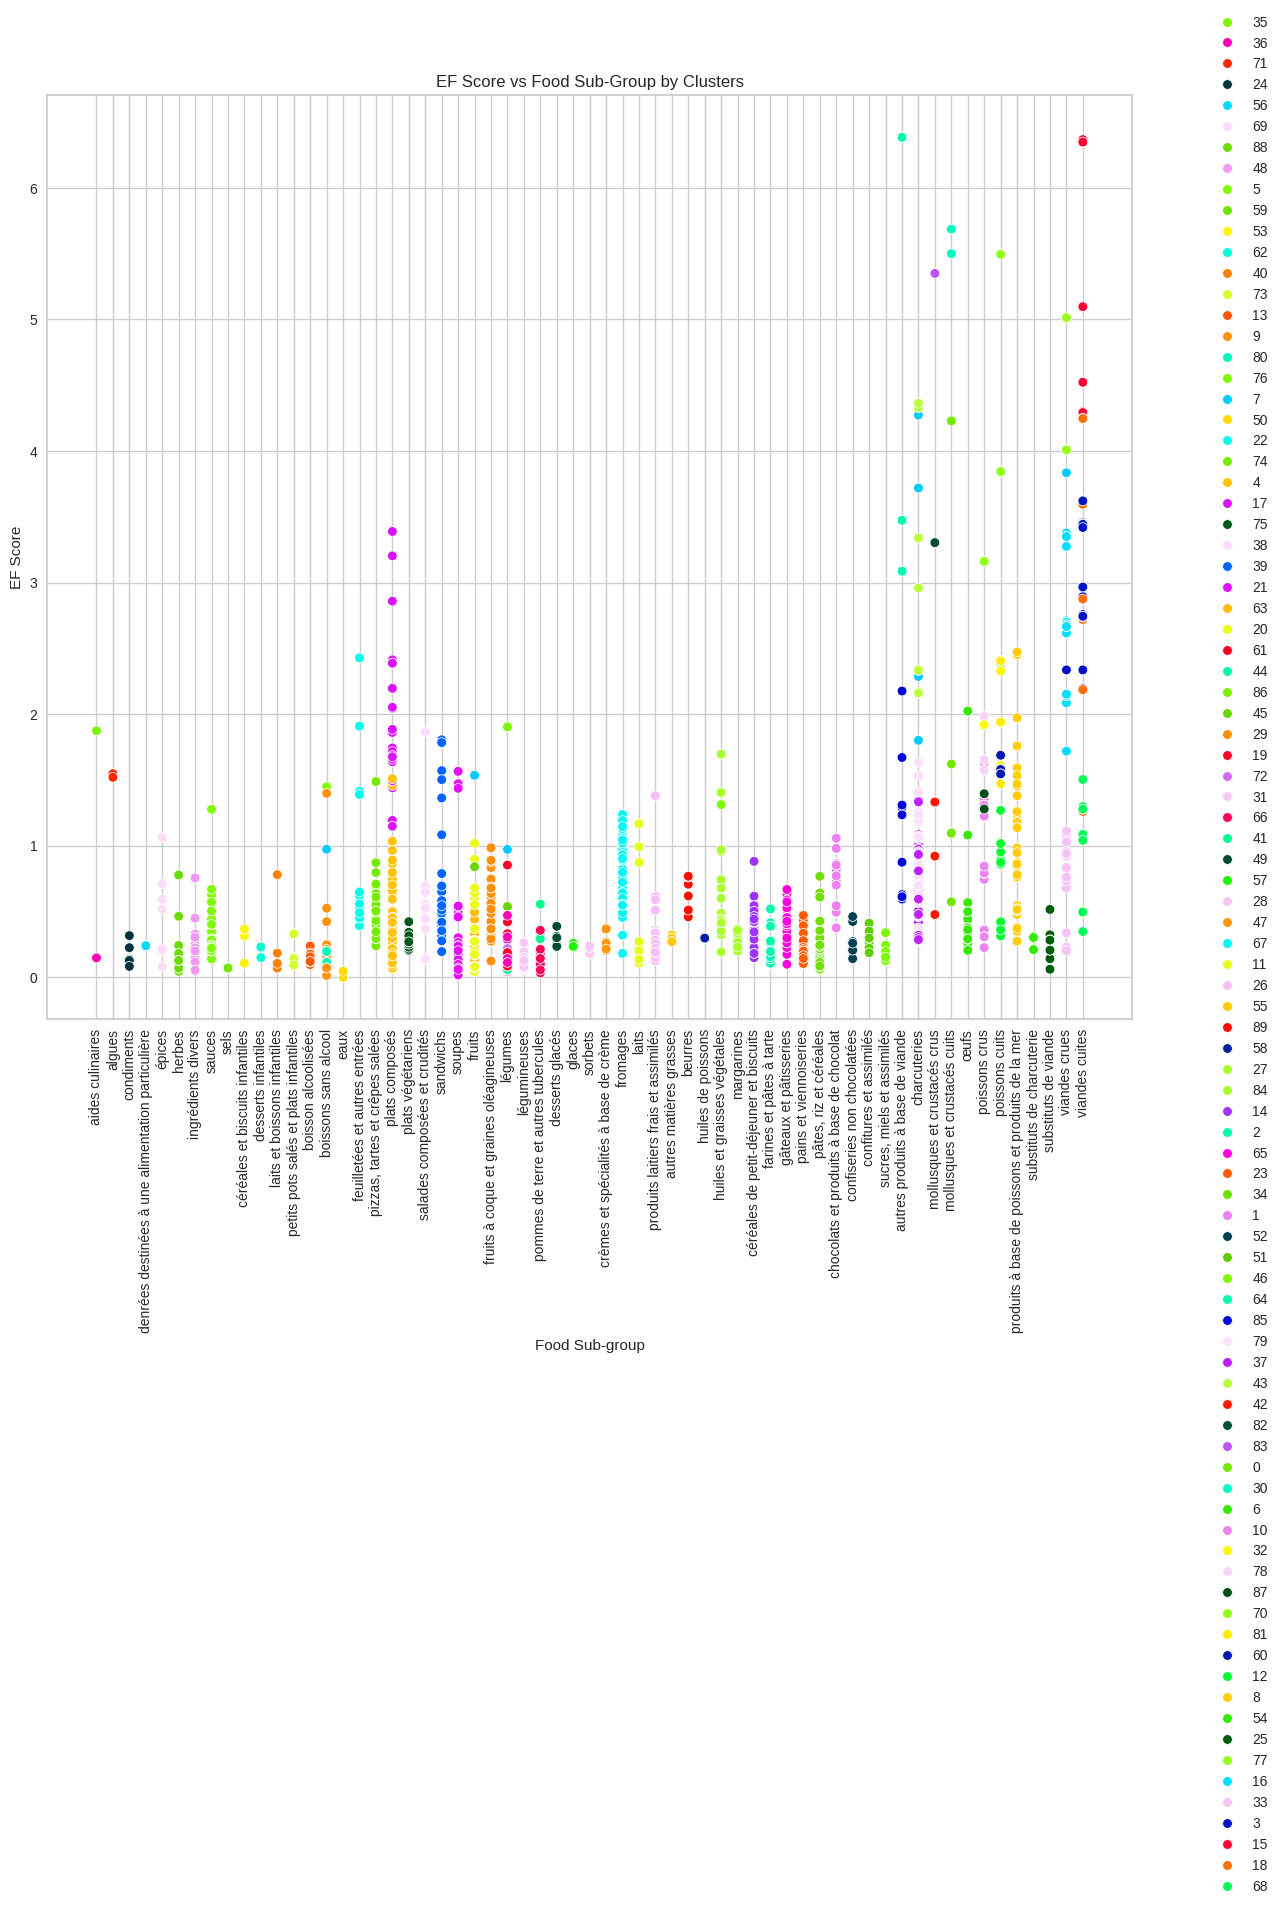

In [30]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.cm.get_cmap("gist_ncar", 90) 
palette = [cmap(i) for i in range(90)]
cmap = plt.cm.get_cmap("gist_ncar", 90 * 5)  # Sample from a wider range

# Select non-continuous indices to avoid smooth gradients
indices = np.random.choice(range(cmap.N), 90, replace=False) 
palette = [cmap(i) for i in indices]

# Create count plot
ax = sns.scatterplot(df_o, x='Food Sub-group', y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('Food Sub-group')
ax.set_ylabel('EF Score')

#
ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


---
### Get scores for the training dataset
---

**Make prediction on training dataset**

---

<center>
    
## Validation

</center>

---

**Run model on testing dataset**

In [31]:
y_pred_test = grid.predict(X_test_scaled)

NameError: name 'grid' is not defined

**Create Confusion Matrix**

---

<center>
    
## Results

</center>

---

### Results

### Results

all = 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 
            'Internet Service', 
            'Online Security', 'Online Backup', 'Device Protection',
            'Tech Support', 'Contract', 'Paperless Billing', 'Payment Method',
            'Monthly Charges', 'Churn Value',

Training dataset (all+ lat/lon)
| Metric       | Precision | Recall | F1-Score | Support |
|-------------|-----------|-------|----------|--------|
| Class 0     | 0.89     | 0.82  | 0.86    | 4132   |
| Class 1     | 0.60     | 0.72  | 0.66    | 1502   |
| Accuracy    |          |       | 0.80    | 5634   |
| Macro Avg   | 0.74     | 0.77  | 0.76    | 5634   |
| Weighted Avg| 0.81     | 0.80  | 0.80    | 5634   |

test(all + lat/lon)
| Metric       | Precision | Recall | F1-Score | Support |
|-------------|-----------|-------|----------|--------|
| Class 0     | 0.88     | 0.79  | 0.84    | 504    |
| Class 1     | 0.59     | 0.74  | 0.65    | 201    |
| Accuracy    |          |       | 0.78    | 705    |
| Macro Avg   | 0.74     | 0.77  | 0.75    | 705    |
| Weighted Avg| 0.80     | 0.78  | 0.78    | 705    |